PRE-BUILT FUNCTION:

1. coefficients:  [0.05136172 0.02232002 0.03332929]
2. Test score: 0.9957631648204319
4. Intercept:  0.3003705555069711
5. Slope:  0.03332929199516685


SELF-BUILT FUNCTIONS
1.coefficients:  [0.02808284 0.05706436 0.02851233]
2. Variance Score for test data:  0.996726825273917
3. Slope:  0.028512333354519026


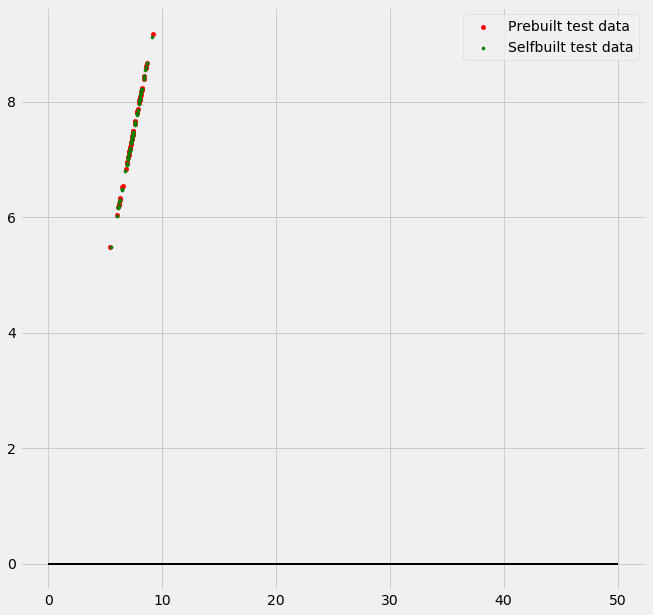

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score


 #calculating the variance score for test data by y_predicted and y_true values as y_predicted=x.b and calculating variance
#by calling explained_variance_score function"
def predict(c,x):
    y_predict= np.dot(coeff,x.T)
    return(y_predict)
      
    
#main function begins with seeing the random data so that eyerytime we run it, the data doesn't change    
k=np.random.normal(75,5,200)
k.sort()
k1=np.random.normal(65,5,200)
k1.sort()
k2=np.random.normal(55,10,200)
k2.sort()
g=np.random.normal(7.5,0.7,200)
g.sort()
df=pd.DataFrame(k,columns=['English'])
df['Maths']=k1
df['Science']=k2
df['grade']=g
df.head()
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) # splitting training and testing data with test data as 40%
x_train=x_train.values
y_train=y_train.values
x_test=x_test.values
y_test=y_test.values

# calling pre built linear regression model
reg=linear_model.LinearRegression() 
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print("PRE-BUILT FUNCTION:\n")
print("1. coefficients: ",reg.coef_)
print("2. Test score: {}".format(r2_score(y_test,y_pred)))
#print("3. Train score: {}".format(r2_score(x_train,y_train)))
print("4. Intercept: ", reg.intercept_)
print("5. Slope: ", np.median(reg.coef_))     
print("\n")

# self built algorithms
reg.fit(x_train,y_train)    # fitting the test data
e= np.ones((len(x_test),1))                  # CREATING X matrix with first column 1                        
x= np.hstack((e,x_test))
y_true=y_test
coeff= np.dot(np.dot(np.linalg.inv(np.dot(x_test.T, x_test)),x_test.T),y_test) # estimating coefficients b=[inverse(x'x)].X'.Y
y_predicted=np.dot(x_test,coeff.T) 
print("SELF-BUILT FUNCTIONS")
print("1.coefficients: ",coeff)
print("2. Variance Score for test data: ",r2_score(y_true, y_predicted,multioutput='uniform_average'))
print("3. Slope: ", np.median(coeff)) # slope is calculated by median of coefficients value

#Plotting the test data of prebuilt and selfbuilt model
#plt.style.use("fivethirtyeight") #screen size and grid size
plt.figure(figsize=(10,10))
plt.scatter(reg.predict(x_test),y_pred,color="red",s=20,label="Prebuilt test data")
plt.scatter(predict(coeff,x_test),y_predicted,color="green",s=10,label="Selfbuilt test data")

plt.hlines(y=0,xmin=0,xmax=50,linewidth=2)

plt.legend(loc="upper right")
plt.show()